# Numerical Methods Assignment
### Student: Gabriel Nagy
## Problem 1 - Longest Ladder
![Figure 2](img/figure2.png)

The length of the longest ladder that can negotiate the corner depicted in Figure 2 can be determined
by computing the value of $\theta$ that minimizes the following function: $$L(\theta) = \frac{w_1}{sin \theta} + \frac{w_2}{sin(\pi - \alpha - \theta)}$$

For the case where $w_1 = w_2 = 2m$, use a numerical method to develop a plot of $L$ versus a range of $\alpha$'s from 45 to 135 degrees.

In [3]:
%matplotlib inline

In [76]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [85]:
# Python's built-in range function assumes an exclusive range,
# here we define an inclusive method to help us in iterating alphas and thetas
def closed_range(start, stop, step=1):
    d = 1 if (step > 0) else -1
    return range(start, stop + d, step)

[Text(0,0.5,'$min(L(\\theta))$'), Text(0.5,0,'$\\alpha$')]

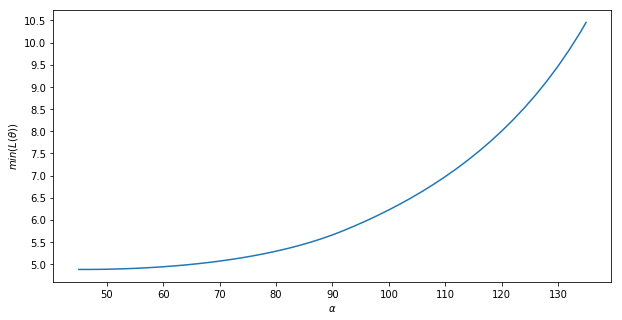

In [96]:
# we initialize w1 and w2 with values from the problem text
w1 = 2
w2 = 2

# we initialize our L(theta) list
min_list = []

# helper function to compute the value of L(theta)
def L_theta(theta, alpha):
    return w1 / np.sin(np.deg2rad(theta)) + w2 / np.sin(np.deg2rad(np.rad2deg(np.pi) - alpha - theta))

# we iterate through our alphas,
# mapping the L_theta function to each alpha and theta,
# saving the minimum value into a list
for alpha in closed_range(45, 135):
    results = [L_theta(theta, alpha) for theta in closed_range(10, 179-135)]
    min_list.append(min(results))

# we plot a graph with our processed data
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(list(closed_range(45, 135)), min_list)

# show more axis ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

ax.set(xlabel=r'$\alpha$', ylabel=r'$min(L(\theta))$')

## Problem 2 - Population estimates
Many fields of engineering require accurate population estimates. For example, transportation engineers might find it necessary to determine separately the population growth trends of a city and its adjacent suburbs. The population of the urban area is declining with time according to
$$P_u(t) = P_{u,max}e^{-k_ut}+P_{u,min},$$
while the suburban population is growing, as in
$$P_s(t) = \frac{P_{s,max}}{1 + (P_{s,max}/P_0 - 1)e^{-k_st}},$$
where $P_{u,max}$, $k_u$, $P_{s,max}$, $P_0$, and $k_s$ are empirically derived parameters. Determine the time and corresponding values of $P_u(t)$ and $P_s(t)$ for the case when the suburbs are 20% larger than the city.
The parameter values are $P_{u,max} = 80,000$, $k_u = 0.05/year$, $P_{u,min} = 110,000$ people, $P_{s,max} = 320,000$ people, $P_0 = 10,000$ people, and $k_s = 0.09/yr$. To obtain your solutions, use (a) graphical, and (b) false-position methods.

In [101]:
# we initialize our variables
Pu_max = 75000
ku = 0.05 # / year
Pu_min = 110000 # people
Ps_max = 320000 # people
Po = 10000 # people
ks = 0.09 # / year
t = closed_range(0,100) # time iterator

In [103]:
# below we define the functions related to the population estimates
def population_urban(time):
    return Pu_max * np.exp(-ku * time) + Pu_min

def population_suburban(time):
    return Ps_max / (1 + (Ps_max / Po - 1) * np.exp(-ks * time))

# knowing the suburbs are 20% larger than the city, we devise
# the function below
def larger_suburbs(time):
    return 1.2 * population_urban(time) - population_suburban(time)

[Text(0,0.5,'$population$'), Text(0.5,0,'$time$')]

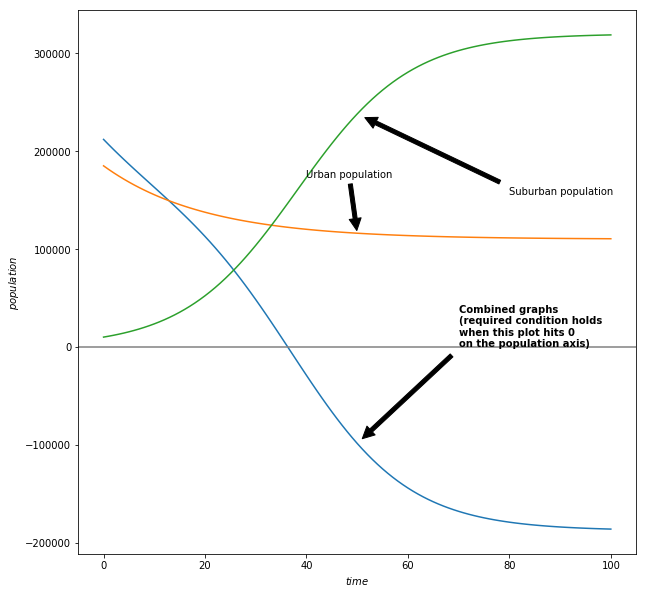

In [192]:
## (a) - graphic method
# we plot a graph with our processed data
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.plot(list(t), [larger_suburbs(time) for time in list(t)])
ax.plot(list(t), [population_urban(time) for time in list(t)])
ax.plot(list(t), [population_suburban(time) for time in list(t)])

ax.annotate('Combined graphs\n(required condition holds\nwhen this plot hits 0\non the population axis)', xy=(list(t)[50], larger_suburbs(list(t)[50])), xytext=(list(t)[70], list(t)[70]),
            arrowprops=dict(facecolor='black', shrink=0.05), weight='bold')
ax.annotate('Urban population', xy=(list(t)[50], population_urban(list(t)[50])), xytext=(list(t)[40], population_suburban(list(t)[40])),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Suburban population', xy=(list(t)[50], population_suburban(list(t)[50])), xytext=(list(t)[80], population_urban(list(t)[10])),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(0, color='gray')


ax.set(xlabel=r'$time$', ylabel=r'$population$')

In [141]:
## (b) - false-position method
# we take arbitrary values for our lower and upper bounds
x_l = 45
x_u = 25
root_list = []

# we iterate a couple of times to find our root
for _ in range(10):
    # x_r is our estimated root
    x_r = x_u - ((larger_suburbs(x_u) * (x_l - x_u)) / (larger_suburbs(x_l) - larger_suburbs(x_u)))
    if larger_suburbs(x_l) * larger_suburbs(x_r) < 0:
        x_u = x_r 
    elif larger_suburbs(x_l) * larger_suburbs(x_r) > 0:
        x_l = x_r
    else:
        print("Found the root at time={}".format(x_r))
        break


Found the root at time=36.29789818331883
